# Why Python? A Hands-On Comparison with JASP

You just learned how to run statistical tests in JASP. Now let's do the **exact same tests** in Python and see what we gain.

## Why bother with code when JASP exists?

JASP is excellent for learning statistical concepts and running quick analyses. Python offers additional capabilities that become valuable as your research grows:

| | JASP (GUI) | Python (Code) |
|---|---|---|
| **Reproducibility** | Need to remember which buttons you clicked | Save code, run again anytime — same result guaranteed |
| **Automation** | Analyze 50 brain regions? Click 50 times | `for region in regions: analyze(region)` — done in seconds |
| **Flexibility** | Limited to built-in options | Create any analysis you can describe |
| **Transparency** | Results appear; steps are hidden | You control (and can inspect) each step |
| **Sharing** | Colleague needs JASP installed | Share a .py file or .ipynb notebook — runs in any Python environment |
| **Scale** | Great for one dataset at a time | Process thousands of files overnight |

**Bottom line:** JASP is great for learning concepts and quick checks. Python gives you power and flexibility for real research.

Let's prove it. We'll replicate everything you just did in JASP — and then go further.

---

## Part 1: Setup and Loading Data

First, let's load the Python libraries we need.

In [52]:
# Step 1: Import the libraries we'll use
import pandas as pd          # For working with data tables
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For creating plots
import scipy.stats as stats  # For statistical tests

print("Libraries loaded successfully!")

Libraries loaded successfully!


### The Study

A pharmacology experiment examining how dopaminergic drugs affect locomotor activity in rodents.

**Dependent Variable**: Number of squares entered in an open-field test (measure of locomotion)

**Independent Variables** (8 drug treatment groups):
- **Control**: No drug (baseline)
- **Amph**: Amphetamine (dopamine releaser → increases locomotion)
- **Res only**: Reserpine (depletes dopamine → decreases locomotion)
- **Res+Amph**: Can amphetamine overcome reserpine's effects?
- **Res+MT**: Reserpine + alpha-methyltyrosine (blocks dopamine synthesis)
- **Res+MT+Amph**: Triple combination
- **Res+MT+DOPA**: L-DOPA (dopamine precursor) to restore function?
- **Res+MT+Amph+DOPA**: Maximum restoration attempt

### Loading Data: The Peek-Then-Use Pattern

**Good habit:** Always look at your data before analyzing it! This helps you catch problems early.

In [53]:
# Step 2: Load the ANOVA dataset
anova_df = pd.read_excel('class_data_undergrad.xlsx')

# Step 3: ALWAYS peek at your data first!
anova_df.head()

,Squares entered,Group
0,54,Control
1,30,Control
2,35,Control
3,18,Control
4,32,Control


In [54]:
# Step 4: Check the structure of your data
print("DATA QUALITY CHECK")
print("=" * 40)
print(f"Number of rows: {len(anova_df)}")
print(f"Number of columns: {len(anova_df.columns)}")
print(f"\nColumn names: {list(anova_df.columns)}")
print(f"\nMissing values: {anova_df.isna().sum().sum()}")
print(f"\nGroups in the data: {anova_df['Group'].unique()}")

DATA QUALITY CHECK
Number of rows: 110
Number of columns: 2

Column names: ['Squares entered', 'Group']

Missing values: 0

Groups in the data: ['Control' 'Amph' 'Res+MT' 'Res+MT+Amph' 'Res+MT+Amph+DOPA' 'Res only'
 'Res+Amph' 'Res+MT+DOPA']



### Visualize Before Analyzing!

**Good habit:** Always plot your data before running statistics. Visualizations help you:
- Spot outliers or data entry errors
- See the pattern before confirming it with numbers
- Choose the right statistical test

We'll use a jittered dot plot (each dot is one animal) so you can see the actual data.
Try changing `alpha`, `color`, or the jitter width to see what changes.


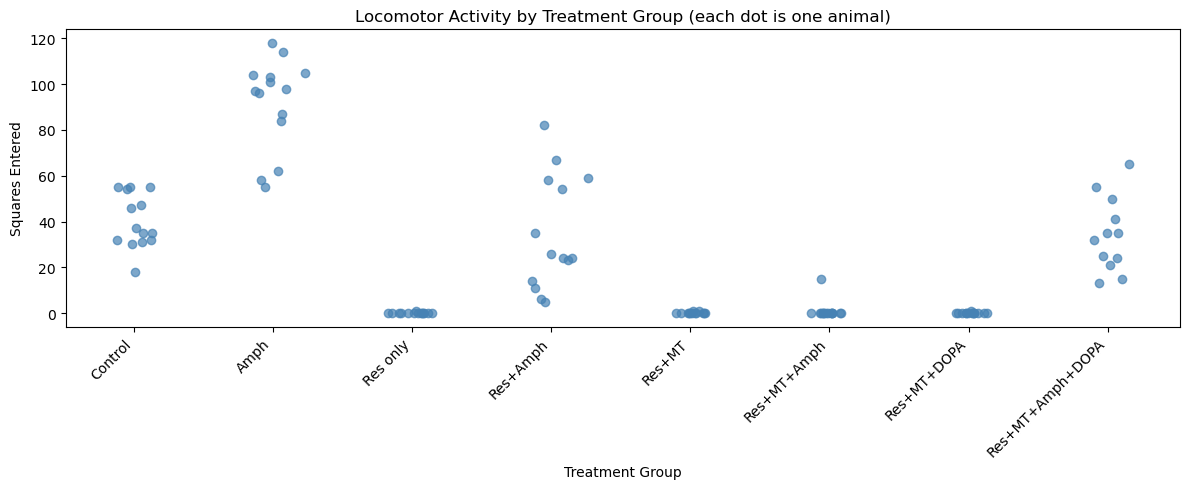

Try changing alpha or the jitter scale to see how the plot changes.


In [55]:

# Step 5: Set a consistent group order (we will reuse this later)
group_order = ['Control', 'Amph', 'Res only', 'Res+Amph', 'Res+MT', 'Res+MT+Amph', 'Res+MT+DOPA', 'Res+MT+Amph+DOPA']

# Step 6: Visualize the data with a jittered dot plot (each dot is one animal)
plt.figure(figsize=(12, 5))

for i, group in enumerate(group_order):
    y = anova_df.loc[anova_df['Group'] == group, 'Squares entered']
    x = np.random.normal(loc=i, scale=0.08, size=len(y))  # jitter so points do not overlap
    plt.scatter(x, y, alpha=0.7, color='steelblue')

plt.xticks(range(len(group_order)), group_order, rotation=45, ha='right')
plt.ylabel('Squares Entered')
plt.xlabel('Treatment Group')
plt.title('Locomotor Activity by Treatment Group (each dot is one animal)')
plt.tight_layout()
plt.show()

print("Try changing alpha or the jitter scale to see how the plot changes.")


In [20]:

# Step 7: Descriptive statistics by group
# This is what JASP calls "Descriptives"
descriptives = anova_df.groupby('Group')['Squares entered'].agg(['count', 'mean', 'std']).round(2)
descriptives.columns = ['N', 'Mean', 'SD']

# Order groups logically for pharmacological interpretation
# (group_order was defined in the previous cell)
descriptives = descriptives.reindex(group_order)

print("Descriptive Statistics by Treatment Group")
print("=" * 50)
print(descriptives.to_string())
print()
print("Compare with your JASP output!")


Descriptive Statistics by Treatment Group
                   N   Mean     SD
Group                             
Control           14  40.14  11.79
Amph              14  91.57  20.12
Res only          14   0.07   0.27
Res+Amph          14  34.86  24.69
Res+MT            13   0.15   0.38
Res+MT+Amph       15   1.00   3.87
Res+MT+DOPA       14   0.07   0.27
Res+MT+Amph+DOPA  12  34.25  16.14

Compare with your JASP output!



---

### Your Turn: Load the T-Test Data

Now it's your turn! Load the file `ttest_data.xlsx` and look at the first few rows with `.head()`.

**Hint:** You'll use `pd.read_excel()` just like we did above.

<details>
<summary>Click to reveal answer</summary>

```python
ttest_df1 = pd.read_excel('ttest_data.xlsx')
ttest_df1.head()
```

</details>


In [51]:
# Your code here:



---

## Part 2: T-Tests

We'll analyze both datasets from your JASP session and compare independent vs. paired t-tests.

### Data Set 1: Load and Inspect

We'll use a clean file called `ttest_data.xlsx` with two sheets:
- `Sheet1`: equal variances
- `Sheet2`: unequal variances


In [27]:

# Step 1: Load Sheet1 (equal variances)
df1 = pd.read_excel('ttest_data.xlsx', sheet_name='Sheet1')

# Step 2: Peek at the data
df1.head()


Raw data (first 18 rows):
            0         1         2
0         NaN       NaN       NaN
1         New       Old       NaN
2          13        12       NaN
3          17         8       NaN
4          19         6       NaN
5          10        16       NaN
6          20        12       NaN
7          15        14       NaN
8          18        10       NaN
9           9        18       NaN
10         12         4       NaN
11         15        11       NaN
12         16       NaN       NaN
13        NaN       NaN       NaN
14         11        10      size
15  14.909091      11.1      mean
16   3.590391  4.332051  variance

... and the last few rows:
            0         1         2
12         16       NaN       NaN
13        NaN       NaN       NaN
14         11        10      size
15  14.909091      11.1      mean
16   3.590391  4.332051  variance



Now pull out the two columns as arrays so we can run the t-test.


In [ ]:

# Extract the New and Old columns as arrays
new_data1 = df1['New'].dropna().to_numpy()
old_data1 = df1['Old'].dropna().to_numpy()

print("T-Test Data Set 1 (Equal Variances):")
print(f"  New group: n={len(new_data1)}, mean={new_data1.mean():.2f}, SD={new_data1.std(ddof=1):.2f}")
print(f"  Old group: n={len(old_data1)}, mean={old_data1.mean():.2f}, SD={old_data1.std(ddof=1):.2f}")



### Visualize Before Testing

Before running the t-test, let's see what the data looks like.
We'll use a histogram and a jittered dot plot (each dot is one data point).


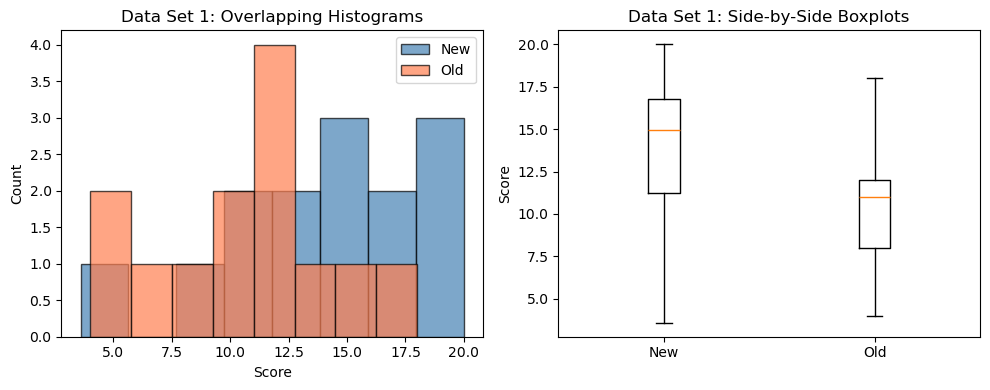

The groups look fairly similar in spread (variance). Is the New group higher?


In [28]:

# Visualize the two groups
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(new_data1, bins=8, alpha=0.7, label='New', color='steelblue', edgecolor='black')
axes[0].hist(old_data1, bins=8, alpha=0.7, label='Old', color='coral', edgecolor='black')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Count')
axes[0].set_title('Data Set 1: Overlapping Histograms')
axes[0].legend()

# Jittered dot plot (each dot is one observation)
x_new = np.random.normal(loc=0, scale=0.06, size=len(new_data1))
x_old = np.random.normal(loc=1, scale=0.06, size=len(old_data1))
axes[1].scatter(x_new, new_data1, alpha=0.7, color='steelblue', label='New')
axes[1].scatter(x_old, old_data1, alpha=0.7, color='coral', label='Old')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['New', 'Old'])
axes[1].set_ylabel('Score')
axes[1].set_title('Data Set 1: Jittered Dot Plot')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Try changing bins, alpha, or colors and see what changes.")


### Independent Samples T-Test

**Question**: Is there a difference between the New and Old groups?

In JASP: T-Tests → Independent Samples T-Test → drag variables → click options...

In Python: One line of code!

In [30]:
# This cell actually does the tests and stores the results in variables t_stat and p_value.
# Independent samples t-test (assumes equal variances)
t_stat, p_value = stats.ttest_ind(new_data1, old_data1)

In [31]:
# This cell displays the results, with various formatting
# (mean rounded to 2 decimal points)
# (pval rounded to 4, t to 3, etc.)

print("INDEPENDENT SAMPLES T-TEST (Data Set 1)")
print("=" * 45)
print(f"New group mean: {new_data1.mean():.2f} (n={len(new_data1)})")
print(f"Old group mean: {old_data1.mean():.2f} (n={len(old_data1)})")
print(f"\nt = {t_stat:.3f}, p = {p_value:.4f}")
print(f"\nSignificant at α=0.05? {'Yes' if p_value < 0.05 else 'No'}")

INDEPENDENT SAMPLES T-TEST (Data Set 1)
New group mean: 13.82 (n=14)
Old group mean: 10.49 (n=13)

t = 1.999, p = 0.0566

Significant at α=0.05? No


### Teaching Moment: Independent vs. Paired T-Tests

What happens if we run the same data as a **paired** t-test? The results will differ!

- **Independent t-test**: Assumes the groups are unrelated (different subjects)
- **Paired t-test**: Assumes each observation in one group is matched to one in the other

---

**Important Warning:** The following is a "what happens if we use the wrong test" demonstration. A paired t-test requires **true subject-level pairing** (e.g., the same person measured before and after treatment). We're artificially pairing unrelated observations here to show how results change — **never do this with real data!**

In [32]:
# For paired t-test, we need equal sample sizes
# Truncate to the smaller group (this is artificial pairing - just for demonstration!)
n_min = min(len(new_data1), len(old_data1))
new_paired = new_data1[:n_min]
old_paired = old_data1[:n_min]

# Independent t-test
t_ind, p_ind = stats.ttest_ind(new_paired, old_paired)

# Paired t-test (ttest_rel = related samples)
t_paired, p_paired = stats.ttest_rel(new_paired, old_paired)

print("COMPARISON: Independent vs. Paired T-Tests")
print("=" * 50)
print(f"Using first {n_min} observations from each group\n")
print(f"Independent t-test: t = {t_ind:.3f}, p = {p_ind:.4f}")
print(f"Paired t-test:      t = {t_paired:.3f}, p = {p_paired:.4f}")
print("\n** Key insight: The p-values differ! **")
print("\nWhen to use each:")
print("  - Independent: Different subjects in each group (e.g., treatment vs control)")
print("  - Paired: Same subjects measured twice (e.g., before vs after)")

COMPARISON: Independent vs. Paired T-Tests
Using first 13 observations from each group

Independent t-test: t = 2.730, p = 0.0117
Paired t-test:      t = 2.287, p = 0.0412

** Key insight: The p-values differ! **

When to use each:
  - Independent: Different subjects in each group (e.g., treatment vs control)
  - Paired: Same subjects measured twice (e.g., before vs after)



---

### Your Turn: Create a Histogram

Create a histogram showing just the `new_data1` values. Start with:
- `bins=10`
- `color='steelblue'`
- `edgecolor='black'`
- `alpha=0.8` (optional)

Then try changing `bins`, `alpha`, or `color` to see the effect.

Don't forget to add a title with `plt.title()` and show the plot with `plt.show()`.

It's okay if you get it wrong the first time. This is part of the learning process.

<details>
<summary>Click to reveal answer</summary>

```python
plt.hist(new_data1, bins=10, color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Distribution of New Group Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()
```

</details>


In [34]:
# Your code here:



---

### Data Set 2: Unequal Variances — When Standard T-Tests Fail

**Problem**: The standard t-test assumes equal variances. But sometimes groups have very different spreads. Let's load `Sheet2` and see:


In [35]:

# Step 1: Load Sheet2 (unequal variances)
df2 = pd.read_excel('ttest_data.xlsx', sheet_name='Sheet2')

# Step 2: Extract columns
new_data2 = df2['New'].dropna().to_numpy()
old_data2 = df2['Old'].dropna().to_numpy()

print("T-Test Data Set 2 (Unequal Variances):")
print(f"  New group: n={len(new_data2)}, mean={new_data2.mean():.2f}, SD={new_data2.std(ddof=1):.2f}")
print(f"  Old group: n={len(old_data2)}, mean={old_data2.mean():.2f}, SD={old_data2.std(ddof=1):.2f}")


T-Test Data Set 2 (Unequal Variances):
  New group: n=13, mean=18.47, SD=11.13
  Old group: n=13, mean=10.49, SD=4.19


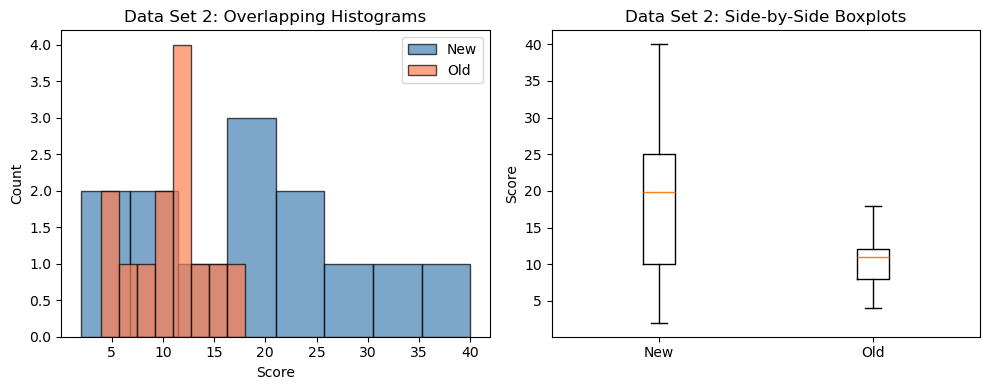

Notice how the 'New' group is MUCH more spread out than the 'Old' group!


In [36]:

# VISUALIZE the variance difference — much clearer than numbers!
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(new_data2, bins=8, alpha=0.7, label='New', color='steelblue', edgecolor='black')
axes[0].hist(old_data2, bins=8, alpha=0.7, label='Old', color='coral', edgecolor='black')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Count')
axes[0].set_title('Data Set 2: Overlapping Histograms')
axes[0].legend()

# Jittered dot plot (each dot is one observation)
x_new = np.random.normal(loc=0, scale=0.06, size=len(new_data2))
x_old = np.random.normal(loc=1, scale=0.06, size=len(old_data2))
axes[1].scatter(x_new, new_data2, alpha=0.7, color='steelblue', label='New')
axes[1].scatter(x_old, old_data2, alpha=0.7, color='coral', label='Old')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['New', 'Old'])
axes[1].set_ylabel('Score')
axes[1].set_title('Data Set 2: Jittered Dot Plot')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Notice how the 'New' group is MUCH more spread out than the 'Old' group!")


In [37]:
# Check variances numerically
var_new = new_data2.var(ddof=1)
var_old = old_data2.var(ddof=1)

print("Variance Check (Data Set 2):")
print(f"  New group: variance = {var_new:.2f}, SD = {np.sqrt(var_new):.2f}")
print(f"  Old group: variance = {var_old:.2f}, SD = {np.sqrt(var_old):.2f}")
print(f"\nVariance ratio: {var_new/var_old:.2f}x difference!")

# Levene's test for equality of variances
lev_stat, lev_p = stats.levene(new_data2, old_data2)
print(f"\nLevene's test: F = {lev_stat:.3f}, p = {lev_p:.4f}")
if lev_p > 0.05:
    print("Equal variances? Yes (p > 0.05)")
else:
    print("Equal variances? No (p < 0.05) — use Welch's t-test!")

Variance Check (Data Set 2):
  New group: variance = 123.77, SD = 11.13
  Old group: variance = 17.60, SD = 4.19

Variance ratio: 7.03x difference!

Levene's test: F = 7.323, p = 0.0123
Equal variances? No (p < 0.05) — use Welch's t-test!


In [38]:
# Compare standard vs Welch's t-test
t_standard, p_standard = stats.ttest_ind(new_data2, old_data2, equal_var=True)
t_welch, p_welch = stats.ttest_ind(new_data2, old_data2, equal_var=False)  # Welch's

print("T-TEST COMPARISON (Data Set 2 - Unequal Variances)")
print("=" * 55)
print(f"New group: mean = {new_data2.mean():.2f}, SD = {new_data2.std(ddof=1):.2f}")
print(f"Old group: mean = {old_data2.mean():.2f}, SD = {old_data2.std(ddof=1):.2f}")
print(f"\nStandard t-test (assumes equal var): t = {t_standard:.3f}, p = {p_standard:.4f}")
print(f"Welch's t-test  (unequal var OK):    t = {t_welch:.3f}, p = {p_welch:.4f}")
print("\n** When variances are unequal, use Welch's t-test! **")
print("In Python: stats.ttest_ind(a, b, equal_var=False)")

T-TEST COMPARISON (Data Set 2 - Unequal Variances)
New group: mean = 18.47, SD = 11.13
Old group: mean = 10.49, SD = 4.19

Standard t-test (assumes equal var): t = 2.418, p = 0.0236
Welch's t-test  (unequal var OK):    t = 2.418, p = 0.0285

** When variances are unequal, use Welch's t-test! **
In Python: stats.ttest_ind(a, b, equal_var=False)



---

## Part 3: One-Way ANOVA

**Question**: Does locomotor activity differ across the 8 drug treatment groups?

In JASP: ANOVA → drag Dependent Variable → drag Fixed Factors → check Post Hoc...

In Python: First visualize, then test!

We'll do this in three small steps:
1. Collect each group's data into a dictionary
2. Run the ANOVA
3. Print results and group means


<Figure size 1200x500 with 0 Axes>

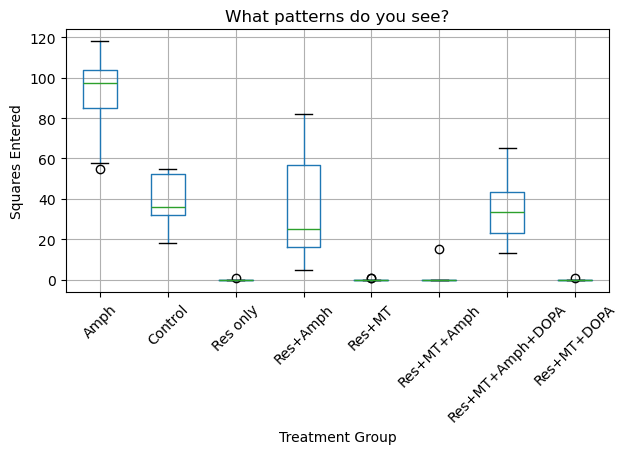

Look at the plot: Which groups appear different from Control?
Which groups have near-zero locomotion?


In [39]:

# Always visualize before running stats!
plt.figure(figsize=(12, 5))

for i, group in enumerate(group_order):
    y = anova_df.loc[anova_df['Group'] == group, 'Squares entered']
    x = np.random.normal(loc=i, scale=0.08, size=len(y))
    plt.scatter(x, y, alpha=0.7, color='gray')

plt.xticks(range(len(group_order)), group_order, rotation=45, ha='right')
plt.title('What patterns do you see?')
plt.ylabel('Squares Entered')
plt.xlabel('Treatment Group')
plt.tight_layout()
plt.show()

print("Look at the plot: Which groups appear different from Control?")
print("Which groups have near-zero locomotion?")


In [40]:

# Step 1: Separate the data into groups
groups = {}
for group_name in group_order:
    groups[group_name] = anova_df[anova_df['Group'] == group_name]['Squares entered'].values

# Step 2: Run the one-way ANOVA
F_stat, p_value = stats.f_oneway(*groups.values())

# Step 3: Calculate degrees of freedom
k = len(groups)  # number of groups
N = len(anova_df)  # total sample size
df_between = k - 1
df_within = N - k

# Step 4: Format p-value properly (do not hard-code)
if p_value < 0.001:
    p_str = "p < .001"
else:
    p_str = f"p = {p_value:.4f}"

print("ONE-WAY ANOVA: Locomotor Activity by Treatment Group")
print("=" * 55)
print()
print(f"F({df_between},{df_within}) = {F_stat:.2f}, {p_str}")
print()
print("** Compare with JASP: F(7,102) = 82.00, p < .001 **")
print()
print("Group means (squares entered):")
for group_name in group_order:
    mean = groups[group_name].mean()
    print(f"  {group_name:20s}: {mean:6.2f}")


ONE-WAY ANOVA: Locomotor Activity by Treatment Group

F(7,102) = 82.00, p < .001

** Compare with JASP: F(7,102) = 82.00, p < .001 **

Group means (squares entered):
  Control             :  40.14
  Amph                :  91.57
  Res only            :   0.07
  Res+Amph            :  34.86
  Res+MT              :   0.15
  Res+MT+Amph         :   1.00
  Res+MT+DOPA         :   0.07
  Res+MT+Amph+DOPA    :  34.25



---

## Part 4: Post-Hoc Comparisons (Tukey HSD)

The ANOVA tells us groups differ, but **which** groups differ from each other?

With 8 groups, we have 8×7/2 = **28 pairwise comparisons**.

### Why Not Just Run 28 T-Tests?

You might think: "If I want to compare 8 groups, I'll just run all pairwise t-tests!"

**The problem:** With 28 comparisons at α = 0.05, you expect ~1-2 false positives by chance alone. This is called the **multiple comparisons problem**.

**Solutions:**
1. **Tukey HSD** (what we'll use) — adjusts p-values to control family-wise error rate
2. **Bonferroni correction** — multiply each p-value by the number of tests (more conservative)

We'll do this in two steps:
1. Run Tukey HSD
2. Print the results in a readable table


In [41]:

from scipy.stats import tukey_hsd

# Step 1: Run Tukey HSD for all pairwise comparisons
result = tukey_hsd(*[groups[g] for g in group_order])

# Step 2: Print the results as a table
print("TUKEY HSD POST-HOC COMPARISONS")
print("=" * 70)
print(f"{'Comparison':<45} {'Mean Diff':>10} {'p-value':>10}")
print("-" * 70)

# Store significant and non-significant comparisons
significant_pairs = []
nonsig_pairs = []

for i in range(len(group_order)):
    for j in range(i+1, len(group_order)):
        g1, g2 = group_order[i], group_order[j]
        mean_diff = groups[g1].mean() - groups[g2].mean()
        p_val = result.pvalue[i, j]

        sig_marker = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
        comparison = f"{g1} vs {g2}"
        print(f"{comparison:<45} {mean_diff:>10.2f} {p_val:>10.3f} {sig_marker}")

        if p_val < 0.05:
            significant_pairs.append((g1, g2, mean_diff, p_val))
        else:
            nonsig_pairs.append((g1, g2, mean_diff, p_val))

print("-" * 70)
print(f"Significant comparisons: {len(significant_pairs)} of 28")
print("*** p < .001, ** p < .01, * p < .05")


TUKEY HSD POST-HOC COMPARISONS
Comparison                                     Mean Diff    p-value
----------------------------------------------------------------------
Control vs Amph                                   -51.43      0.000 ***
Control vs Res only                                40.07      0.000 ***
Control vs Res+Amph                                 5.29      0.965 
Control vs Res+MT                                  39.99      0.000 ***
Control vs Res+MT+Amph                             39.14      0.000 ***
Control vs Res+MT+DOPA                             40.07      0.000 ***
Control vs Res+MT+Amph+DOPA                         5.89      0.950 
Amph vs Res only                                   91.50      0.000 ***
Amph vs Res+Amph                                   56.71      0.000 ***
Amph vs Res+MT                                     91.42      0.000 ***
Amph vs Res+MT+Amph                                90.57      0.000 ***
Amph vs Res+MT+DOPA                         

In [42]:
# Highlight key pharmacological findings — using COMPUTED p-values from Tukey results
print("\nKEY PHARMACOLOGICAL FINDINGS")
print("=" * 60)

# Helper function to format p-values
def format_p(p):
    if p < 0.001:
        return "p < .001"
    else:
        return f"p = {p:.3f}"

# Get p-values from Tukey result matrix
# Indices match group_order: Control=0, Amph=1, Res only=2, etc.
p_amph_ctrl = result.pvalue[0, 1]  # Control vs Amph
p_res_ctrl = result.pvalue[0, 2]   # Control vs Res only
p_resamph_ctrl = result.pvalue[0, 3]  # Control vs Res+Amph
p_final_ctrl = result.pvalue[0, 7]  # Control vs Res+MT+Amph+DOPA

print("\n1. Amphetamine INCREASES locomotion:")
amph_vs_ctrl = groups['Amph'].mean() - groups['Control'].mean()
print(f"   Amph vs Control: +{amph_vs_ctrl:.1f} squares ({format_p(p_amph_ctrl)})")

print("\n2. Reserpine ABOLISHES locomotion:")
res_vs_ctrl = groups['Res only'].mean() - groups['Control'].mean()
print(f"   Res only vs Control: {res_vs_ctrl:.1f} squares ({format_p(p_res_ctrl)})")

print("\n3. Amphetamine PARTIALLY restores function after reserpine:")
print(f"   Res+Amph mean: {groups['Res+Amph'].mean():.1f} (vs Control: {format_p(p_resamph_ctrl)})")

print("\n4. MT blocks the amphetamine restoration:")
print(f"   Res+MT+Amph mean: {groups['Res+MT+Amph'].mean():.1f} (essentially zero)")

print("\n5. L-DOPA + Amph can restore function even with MT:")
print(f"   Res+MT+Amph+DOPA mean: {groups['Res+MT+Amph+DOPA'].mean():.1f} (vs Control: {format_p(p_final_ctrl)})")

print("\n** These findings demonstrate the dopamine hypothesis of locomotion! **")


KEY PHARMACOLOGICAL FINDINGS

1. Amphetamine INCREASES locomotion:
   Amph vs Control: +51.4 squares (p < .001)

2. Reserpine ABOLISHES locomotion:
   Res only vs Control: -40.1 squares (p < .001)

3. Amphetamine PARTIALLY restores function after reserpine:
   Res+Amph mean: 34.9 (vs Control: p = 0.965)

4. MT blocks the amphetamine restoration:
   Res+MT+Amph mean: 1.0 (essentially zero)

5. L-DOPA + Amph can restore function even with MT:
   Res+MT+Amph+DOPA mean: 34.2 (vs Control: p = 0.950)

** These findings demonstrate the dopamine hypothesis of locomotion! **


---

### Your Turn: Run a T-Test

Run an independent samples t-test comparing the `Control` group to the `Res only` group.

Use `stats.ttest_ind()` with the data from the `groups` dictionary we created earlier.

**Hint:** Access the data with `groups['Control']` and `groups['Res only']`

<details>
<summary>Click to reveal answer</summary>

```python
t_stat, p_val = stats.ttest_ind(groups['Control'], groups['Res only'])
print(f"t = {t_stat:.3f}, p = {p_val:.4f}")
print(f"Control mean: {groups['Control'].mean():.2f}")
print(f"Res only mean: {groups['Res only'].mean():.2f}")
```

</details>

In [50]:
# Try here:



---

## Part 5: Things Python Can Do That JASP Can't

### Advantage 1: Automation

What if you needed to run pairwise comparisons for multiple outcome measures? In JASP, you'd click through menus dozens of times. In Python, it's a loop.

We'll do this in three steps:
1. Loop through all pairs of groups
2. Store results in a list and convert to a DataFrame
3. Apply Bonferroni correction


In [43]:

# Run all 28 pairwise t-tests programmatically
print("AUTOMATED PAIRWISE T-TESTS (all 28 comparisons)")
print("=" * 55)

# Step 1: Loop through all pairs of groups
results_list = []
for i in range(len(group_order)):
    for j in range(i+1, len(group_order)):
        g1, g2 = group_order[i], group_order[j]
        t, p = stats.ttest_ind(groups[g1], groups[g2])
        results_list.append({
            'Group 1': g1,
            'Group 2': g2,
            't': t,
            'p': p,
            'significant': p < 0.05
        })

# Step 2: Convert to a DataFrame
results_df = pd.DataFrame(results_list)
print()
print(f"Ran {len(results_df)} t-tests in a loop.")
print(f"Significant results (uncorrected): {results_df['significant'].sum()}")

# Step 3: Apply Bonferroni correction
results_df['p_bonf'] = results_df['p'] * len(results_df)
results_df['p_bonf'] = results_df['p_bonf'].clip(upper=1.0)  # Cap at 1.0
results_df['sig_bonf'] = results_df['p_bonf'] < 0.05
print(f"Significant after Bonferroni correction: {results_df['sig_bonf'].sum()}")

print()
print("Note: Running many uncorrected t-tests inflates false positives!")
print("Always use Tukey HSD or Bonferroni correction for post-hoc comparisons.")
print()
print("--> In JASP, you'd click through 28 separate comparisons.")
print("    In Python, 8 lines of code.")


AUTOMATED PAIRWISE T-TESTS (all 28 comparisons)

Ran 28 t-tests in a loop.
Significant results (uncorrected): 19
Significant after Bonferroni correction: 19

⚠️ Note: Running many uncorrected t-tests inflates false positives!
   Always use Tukey HSD or Bonferroni correction for post-hoc comparisons.

--> In JASP, you'd click through 28 separate comparisons.
    In Python, 8 lines of code.



### Advantage 2: Custom Visualizations

JASP gives you canned plots. Python gives you full control.

Try changing colors, labels, or `alpha` values to see how the plot changes.


In [ ]:

# Bar plot with error bars
fig, ax = plt.subplots(figsize=(12, 6))

means = [groups[g].mean() for g in group_order]
sems = [groups[g].std() / np.sqrt(len(groups[g])) for g in group_order]

# Color code by drug effect (use simple named colors; try your own)
colors = ['green',   # Control
          'red',     # Amph
          'blue',    # Res only
          'orange',  # Res+Amph
          'blue',    # Res+MT
          'blue',    # Res+MT+Amph
          'blue',    # Res+MT+DOPA
          'orange']  # Res+MT+Amph+DOPA

bars = ax.bar(range(len(group_order)), means, yerr=sems,
              color=colors, edgecolor='black', capsize=4, alpha=0.8)

ax.set_xticks(range(len(group_order)))
ax.set_xticklabels(group_order, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Squares Entered (± SEM)', fontsize=12)
ax.set_xlabel('Treatment Group', fontsize=12)

# Use computed F and p for title
if p_value < 0.001:
    title_p = "p < .001"
else:
    title_p = f"p = {p_value:.3f}"

title_text = f"Locomotor Activity by Pharmacological Treatment\nF({df_between},{df_within}) = {F_stat:.2f}, {title_p}"
ax.set_title(title_text, fontsize=14)

# Add horizontal line at Control mean for reference
ax.axhline(y=groups['Control'].mean(), color='gray', linestyle='--', alpha=0.5, label='Control baseline')
ax.legend()

plt.tight_layout()
plt.show()

print("Try changing the colors or alpha values to customize the plot.")



### Advantage 3: Bootstrap Confidence Intervals

This isn't even an option in JASP's menus. In Python, it's straightforward.

### Why Bootstrap?

Traditional statistics assume your data follows a specific distribution (usually normal). But what if it doesn't? Or what if you have a small sample?

**Bootstrapping** lets you estimate uncertainty without those assumptions:
1. Resample your data (with replacement) thousands of times
2. Calculate your statistic each time
3. The spread of results IS your confidence interval

This is especially useful when:
- Sample sizes are small
- Data is skewed or has outliers
- You want to be confident your results aren't flukes

Try changing `n_bootstrap` or the number of histogram bins to see how results change.


In [ ]:

# Bootstrap CI for Amph vs Control difference
amph = groups['Amph']
control = groups['Control']

# Step 1: Choose the number of bootstrap resamples
n_bootstrap = 10000
boot_diffs = []

# Step 2: Resample and compute mean differences
np.random.seed(42)  # For reproducibility
for _ in range(n_bootstrap):
    boot_amph = np.random.choice(amph, size=len(amph), replace=True)
    boot_ctrl = np.random.choice(control, size=len(control), replace=True)
    boot_diffs.append(boot_amph.mean() - boot_ctrl.mean())

boot_diffs = np.array(boot_diffs)

# Step 3: Summarize the bootstrap results
print("BOOTSTRAP ANALYSIS (10,000 resamples)")
print("=" * 45)
print("Amphetamine vs Control difference")
print()
print(f"Observed difference: {amph.mean() - control.mean():.1f} squares")
print(f"Bootstrap mean:      {np.mean(boot_diffs):.1f} squares")
print(f"95% CI: [{np.percentile(boot_diffs, 2.5):.1f}, {np.percentile(boot_diffs, 97.5):.1f}]")
print()
print(f"P(Amph > Control): {(boot_diffs > 0).mean():.1%}")

# Step 4: Visualize the bootstrap distribution
plt.figure(figsize=(8, 4))
plt.hist(boot_diffs, bins=50, edgecolor='black', alpha=0.7, color='red')
plt.axvline(0, color='black', linewidth=2, linestyle='--', label='No difference')
plt.axvline(np.percentile(boot_diffs, 2.5), color='blue', linewidth=2, linestyle=':', label='95% CI')
plt.axvline(np.percentile(boot_diffs, 97.5), color='blue', linewidth=2, linestyle=':')
plt.xlabel('Amphetamine − Control (squares entered)')
plt.ylabel('Count')
plt.title('Bootstrapped Distribution: Amphetamine Effect')
plt.legend()
plt.tight_layout()
plt.show()


### Advantage 4: Reproducibility

If someone asks *"How did you get that result?"*, you can hand them this notebook. Every step is documented, every analysis is re-runnable.

In JASP, you'd have to write out: *"I clicked ANOVA, then dragged Squares entered into the dependent variable box, then I dragged Group into the grouping variable, then I checked the Tukey option under Post Hoc..."*

In Python, the code **is** the documentation.

---

## Common Errors and What They Mean

When you see an error, don't panic! Here's what common errors mean:

| Error | What it means | How to fix |
|-------|---------------|------------|
| `FileNotFoundError` | Python can't find the file | Check filename spelling, make sure file is in the same folder as the notebook |
| `KeyError: 'column_name'` | That column doesn't exist in your data | Check spelling with `df.columns` to see all column names |
| `ValueError: could not convert string to float` | There's text in a column that should be numbers | Check for header rows or non-numeric data with `df.head()` |
| `NameError: name 'x' is not defined` | You're using a variable before creating it | Make sure you ran the cell that creates that variable first |
| `IndentationError` | Python code isn't lined up correctly | Check that spaces/tabs are consistent |

**Pro tip:** Read error messages from the bottom up — the last line usually tells you what went wrong!

---

## Bonus: Repeated Measures ANOVA (Optional)

Repeated measures designs (same subjects measured multiple times) require special handling. Python can do this using the `pingouin` library, but it requires additional setup.

**This section is optional and won't be covered in today's lab.**

If you want to explore on your own:
1. Install pingouin: `pip install pingouin`
2. See the documentation: [pingouin.rm_anova](https://pingouin-stats.org/generated/pingouin.rm_anova.html)

Example code (don't run unless you have pingouin installed):

```python
import pingouin as pg

# Repeated measures ANOVA
pg.rm_anova(data=df, dv='Score', within='Time', subject='Subject')

# Mixed ANOVA (within + between factors)
pg.mixed_anova(data=df, dv='Score', within='Time', between='Group', subject='Subject')
```

---

## Checkpoint: JASP vs Python

You just replicated **every test** from the JASP lab in Python. Let's count the lines of code:

| Test | Python Code | JASP |
|------|-----------|------|
| Independent t-test | `stats.ttest_ind(a, b)` — **1 line** | 4-5 clicks, drag variables |
| Paired t-test | `stats.ttest_rel(a, b)` — **1 line** | Reshape data, 4-5 clicks |
| Welch's t-test | `stats.ttest_ind(a, b, equal_var=False)` — **1 line** | Buried in options menu |
| Levene's test | `stats.levene(a, b)` — **1 line** | Separate analysis |
| One-way ANOVA | `stats.f_oneway(g1, g2, ...)` — **1 line** | 3-4 clicks, check boxes |
| Tukey HSD | `tukey_hsd(g1, g2, ...)` — **1 line** | Check post-hoc options |
| 28 pairwise tests | Loop: 8 lines total | Click 28× through menus |

The tests are equally simple. **But Python can do things JASP cannot.** We demonstrated:
- Automation (loop through all comparisons)
- Custom publication-quality visualizations
- Bootstrap confidence intervals
- Complete reproducibility


---

## Summary: The Python Cheat Sheet

| What you want to do | Python code |
|---|---|
| Load Excel data | `df = pd.read_excel('file.xlsx')` |
| Load CSV data | `df = pd.read_csv('file.csv')` |
| View first rows | `df.head()` |
| Check data structure | `df.info()` |
| Check for missing values | `df.isna().sum()` |
| Group means | `df.groupby('Group')['DV'].mean()` |
| Descriptive stats | `df.groupby('Group')['DV'].agg(['count', 'mean', 'std'])` |
| Independent t-test | `stats.ttest_ind(group1, group2)` |
| Welch's t-test | `stats.ttest_ind(group1, group2, equal_var=False)` |
| Paired t-test | `stats.ttest_rel(pre, post)` |
| Levene's test | `stats.levene(group1, group2)` |
| One-way ANOVA | `stats.f_oneway(g1, g2, g3, ...)` |
| Tukey HSD | `tukey_hsd(g1, g2, g3, ...)` |
| Bar plot | `plt.bar(x, heights, yerr=errors)` |
| Histogram | `plt.hist(x, bins=30)` |
| Jittered dot plot | `x = np.random.normal(i, 0.08, size=len(y)); plt.scatter(x, y, alpha=0.7)` |

**That's it.** With these functions, you can do everything JASP does — and much more.
